# Introduction

In this study, we aimed to tackle a binary classification problem using various machine learning and deep learning models, including `Logistic Regression`, `Support Vector Classifier (SVC)`, `Random Forest Classifier`, `Artificial Neural Network (ANN)`, `Recurrent Neural Networks (RNN)` and `BERT` model. The primary abjective was to determine which model would perform in accurately classifying the binary tasks at hand.

Our dataset comprised textual data with corresponding binary labels, and we employed a comprehensive approach that included data preprocessing, model training, hyperparameter tuning, and performance evaluation.

### Steps Taken:

**Data Loading:** First, we loaded ad compaign desciptions, followed by the video transcriptions and the on-screen text; the data contained a ground-truth dataset with human-coded responses.

**Data Cleaning:** The textual data has been cleaned and pre-processed by removing any noise, special characters, and stopwords. Lemmatization has been conducted to standardize words.

**Tokenization and Padding:** Data cleaning was done to tokenize the text data and then pad it, thus transforming it to a uniformly attained model input length

**Model Development:** We experienced with multiple classifiers including `Logistic Regression`, `Support Vector Classifier (SVC)`, `Random Forest Classifier`, `Artificial Netural Network`, and `Recurrent Neural Network (RNN)` with Long Short-Term

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
# Load data for the analysis
textual_data = pd.read_csv('textual_data.csv')
ground_truth = pd.read_csv('ground-truth.csv')

In [3]:
# having a look at textual_data
textual_data.head()

,creative_data_id,creative_data_title,creative_data_description,creative_data_duration,creative_data_lifetime_spend_estimated,creative_data_lifetime_airings_count,creative_data_airing_date_first_et,creative_data_airing_date_last_et,speech
0,1471363,30s Add Stories [T1] - 1471363,"The new MINI Countryman is the largest yet, pr...",30,7863776.27,2788,2017-02-02T21:20:48-05:00,2018-07-09T08:50:58-04:00,It's another pure gray morning. Don't know wha...
1,1488315,30s Last Days - 1488315,What would you do if the end of the world was ...,30,20925675.98,3699,2017-03-05T06:37:33-05:00,2018-06-11T03:09:14-04:00,The end of civilization is upon us. Hold your ...
2,1526213,30s Instincts [T2] - 1526213,As a man speeds down a country road in his Aud...,30,426126.14,19,2017-05-17T19:01:07-04:00,2018-02-24T01:51:58-05:00,Audi presens can help prepare for and in some ...
3,1548815,30s Keep the Peace [T1] - 1548815,"On an otherwise peaceful day, two giant monste...",30,1527188.86,313,2017-06-19T07:11:59-04:00,2019-01-06T22:17:44-05:00,The new Honda Odyssey has tons of available sm...
4,1624211,30s Add It Up [T1] - 1624211,Chevy's spokesperson lists off all the feature...,30,8919085.29,1646,2017-10-29T19:42:44-04:00,2018-01-26T21:31:00-05:00,Hi guys. So this is the all new Chevy Equinox....


In [4]:
textual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   creative_data_id                        150 non-null    int64  
 1   creative_data_title                     150 non-null    object 
 2   creative_data_description               150 non-null    object 
 3   creative_data_duration                  150 non-null    int64  
 4   creative_data_lifetime_spend_estimated  150 non-null    float64
 5   creative_data_lifetime_airings_count    150 non-null    int64  
 6   creative_data_airing_date_first_et      150 non-null    object 
 7   creative_data_airing_date_last_et       150 non-null    object 
 8   speech                                  150 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 10.7+ KB


In [5]:
print("The shape of Textual data:",textual_data.shape)
print("The shape of ground truth:",ground_truth.shape)

The shape of Textual data: (150, 9)
The shape of ground truth: (449, 36)


The shpaes of the two dataset are different. For 150 ads, we have 449 Human reviewed ground-truths. Thus, we need to reduce the number of row in a ground-truth dataset to match it with number of row in a textual_data for the analysis.

# Data Cleaning

In [6]:
ground_truth.columns

Index(['Timestamp', 'creative_data_id',
       'Is there a call to go online (e.g., shop online, visit the Web)? ',
       'Is there online contact information provided (e.g., URL, website)? ',
       'Is there a visual or verbal call to purchase (e.g., buy now, order now)?',
       'Does the ad portray a sense of urgency to act (e.g., buy before sales ends, order before ends)? ',
       'Is there an incentive to buy (e.g., a discount, a coupon, a sale or "limited time offer")? ',
       'Is there offline contact information provided (e.g., phone, mail, store location)?',
       'Is there mention of something free? ',
       'Does the ad mention at least one specific product or service (e.g., model, type, item)? ',
       'Is there any verbal or visual mention of the price?',
       'Does the ad show the brand (logo, brand name) or trademark (something that most people know is the brand) multiple times?\n\nFor example, Nike ads often have the "swoosh" logo prominently displayed on shoe

In [7]:
# Checking if textual_data has any buplicates
len(textual_data['creative_data_id'].unique())

150

In [8]:
# Making a count of unique values, which should match our total number of ads
len(ground_truth['creative_data_id'].unique())

150

To reduce the ground_truth dataset to 150 rows, I took the agreement percentage by counting the most `Yes/No` for a question for one ad


In [9]:
# Function to get the most frequent value in a column
def most_frequent_value(series):
  mode = series.mode()
  if len(mode) == 0:
      return series.iloc[0]  # Handling case where mode is empty
  else:
      return mode.iloc[0]


In [10]:
# Function to aggregate responses for one creative_data_id
def aggregate_single_id(data):
    # Apply the function to each column to get the most frequent value
    most_frequent_values = data.apply(lambda x: most_frequent_value(x) if x.name not in ['Timestamp', 'creative_data_id'] else x.iloc[0])

    # Create a single record with the most frequent values
    single_record = most_frequent_values.to_frame().T

    return single_record

In [11]:
aggregated_data = ground_truth.groupby('creative_data_id').apply(aggregate_single_id)

# Reseting the index to get a clean DataFrame
aggregated_data.reset_index(drop=True, inplace=True)
ground_truth = aggregated_data

In [12]:
ground_truth.head()

,Timestamp,creative_data_id,"Is there a call to go online (e.g., shop online, visit the Web)?","Is there online contact information provided (e.g., URL, website)?","Is there a visual or verbal call to purchase (e.g., buy now, order now)?","Does the ad portray a sense of urgency to act (e.g., buy before sales ends, order before ends)?","Is there an incentive to buy (e.g., a discount, a coupon, a sale or ""limited time offer"")?","Is there offline contact information provided (e.g., phone, mail, store location)?",Is there mention of something free?,"Does the ad mention at least one specific product or service (e.g., model, type, item)?",...,Was there a famous person in this ad?,"If yes to the above, write the name of the famous person, if known.",What happened in this ad? (Answer in 2-3 sentences each),What was/were the company's goal(s) with this ad? Choose (potentially multiple) from:,How successful was the ad in achieving its goal(s)?,"How much did you like the ad? (1. Strongly dislike, 2. Dislike, 3. Neither Like or Dislike, 4. Like, 5. Strongly Like)","What was the slogan presented in the ad, if any?","After addressing the specific survey items, write a general description of the ad. You can use answers to the questions above to formulate your answer. Your description should include:\nBrand and Product Identification: \nSpecify the brand and whether a product is being advertised. (1 sentence)\nVisual Elements: Describe what is seen on the screen, including setting, characters, and any text or graphics. (max 2 sentences)\nAuditory Elements: Note what is heard, such as dialogue, voice-over, music, or sound effects. (max 2 sentences)",Any additional feedback or things we should be aware of?,Please enter the video identifier one more time (e.g. 123456789.mp4)
0,5/16/2024 8:00:14,1471363,No,Yes,No,No,No,No,No,Yes,...,No,NaN,During this ad we had a man and a woman taking...,Change how consumers feel about the product/br...,2,2,n/a,Mini USA is advertising their new Countryman c...,I believe the text legibility should be improv...,1471363.mp4
1,5/15/2024 18:09:54,1488315,No,No,No,No,No,No,No,Yes,...,No,NaN,It started with a disaster occurring and the n...,Increase awareness of product/brand,4,3,"Cuervo, ""Tomorrow is Overrated""",The brand being advertised is Jose Cuervo tequ...,NaN,1488315.mp4
2,5/15/2024 19:09:32,1526213,No,No,No,No,Yes,Yes,No,Yes,...,No,NaN,A man is driving an Audi A4 on an open road. W...,"Increase awareness of product/brand, Change wh...",4,2,"""Progress is amplifying your instincts""",The brand in the ad was Audi showcasing their ...,NaN,1526213.mp4
3,5/15/2024 22:02:23,1548815,No,No,No,No,No,No,No,Yes,...,No,NaN,During this ad a family was driving when sudde...,Directly persuade consumers to purchase,4,3,no,Honda is advertising their new Honda Odyssey. ...,no,1548815.mp4
4,5/15/2024 1:24:45,1624211,No,No,No,No,No,No,No,Yes,...,No,NaN,The sales person is introducing a specific car...,Change what consumers know about the product/b...,4,3,No,Chevrolet is advertising their all new Chevy E...,The people's laughter and dialogue were also i...,1624211.mp4


In [13]:
ground_truth.shape

(150, 36)

We successfully reduced the number of rows of the ground_truths dataset. However, the column's names are too large, which makes it hard to work with.

Therefore, Let's take the columns we want to answer and rename them to `question_1`, `question_2`, and so on.

In [14]:

col = ['If "yes" to the above, which of the following emotions is closest to the emotion that the ad was intending the viewer to feel? (Select all that apply.)',
       'If yes to the above, did the ad successfully affect you emotionally, as intended?',
       'If yes to the above, was the ad successfully funny, as intended?']

# droping columns that are not necessary
ground_truth.drop(col, axis=1, inplace=True)


In [15]:
questions = ground_truth.columns.copy()
questions = questions[2:23]

In [16]:
# Questions we are trying to answer
questions

Index(['Is there a call to go online (e.g., shop online, visit the Web)? ',
       'Is there online contact information provided (e.g., URL, website)? ',
       'Is there a visual or verbal call to purchase (e.g., buy now, order now)?',
       'Does the ad portray a sense of urgency to act (e.g., buy before sales ends, order before ends)? ',
       'Is there an incentive to buy (e.g., a discount, a coupon, a sale or "limited time offer")? ',
       'Is there offline contact information provided (e.g., phone, mail, store location)?',
       'Is there mention of something free? ',
       'Does the ad mention at least one specific product or service (e.g., model, type, item)? ',
       'Is there any verbal or visual mention of the price?',
       'Does the ad show the brand (logo, brand name) or trademark (something that most people know is the brand) multiple times?\n\nFor example, Nike ads often have the "swoosh" logo prominently displayed on shoes and apparel worn by celebrity athletes

In [17]:
ground_truth[questions].isna().sum()

Is there a call to go online (e.g., shop online, visit the Web)?                                                                                                                                                                                                                                                                 0
Is there online contact information provided (e.g., URL, website)?                                                                                                                                                                                                                                                               0
Is there a visual or verbal call to purchase (e.g., buy now, order now)?                                                                                                                                                                                                                                                         0
Does the ad portray a sense of 

There are no `NaN` values in the depedendent variables.

In [18]:
ground_truth['Is there any verbal or visual mention of the price?']

0               No
1               No
2      Yes, visual
3               No
4               No
          ...     
145             No
146             No
147             No
148             No
149             No
Name: Is there any verbal or visual mention of the price?, Length: 150, dtype: object

In [19]:
new_ground_truth = ground_truth[questions]

# I noticed, that the below column has values like `Yes,visual`
new_ground_truth['Is there any verbal or visual mention of the price?'] = np.where(
    new_ground_truth['Is there any verbal or visual mention of the price?'].str.startswith('Yes'),
    'Yes', 'No'
) # If it start with Yes, then we replace the wohle value with `YES`, else `NO`
new_ground_truth.replace(('Yes', 'No'), (1, 0), inplace=True) # Converting Yes and No to 1 and 0
new_ground_truth.head()

<ipython-input-19-12e396560a2c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_ground_truth['Is there any verbal or visual mention of the price?'] = np.where(
<ipython-input-19-12e396560a2c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_ground_truth.replace(('Yes', 'No'), (1, 0), inplace=True) # Converting Yes and No to 1 and 0


,"Is there a call to go online (e.g., shop online, visit the Web)?","Is there online contact information provided (e.g., URL, website)?","Is there a visual or verbal call to purchase (e.g., buy now, order now)?","Does the ad portray a sense of urgency to act (e.g., buy before sales ends, order before ends)?","Is there an incentive to buy (e.g., a discount, a coupon, a sale or ""limited time offer"")?","Is there offline contact information provided (e.g., phone, mail, store location)?",Is there mention of something free?,"Does the ad mention at least one specific product or service (e.g., model, type, item)?",Is there any verbal or visual mention of the price?,"Does the ad show the brand (logo, brand name) or trademark (something that most people know is the brand) multiple times?\n\nFor example, Nike ads often have the ""swoosh"" logo prominently displayed on shoes and apparel worn by celebrity athletes. The ""Just Do It"" slogan is another Nike trademark frequently included.",...,"Is the ad intended to affect the viewer emotionally, either with positive emotion (fun, joy), negative emotion (sad, anxious) or another type of emotion? (Note: You may not personally agree, but assess if that was the intention.)",Does the ad give you a positive feeling about the brand?,"Does the ad have a story arc, with a beginning and an end?","Does the ad have a reversal of fortune, where something changes for the better, or changes for the worse?",Does the ad have relatable characters?,Is the ad creative/clever?,"Is the ad intended to be funny? (Note: You may not personally agree, but assess if that was the intention.)","Does this ad provide sensory stimulation (e.g., cool visuals, arousing music, mouth-watering)?",Is the ad visually pleasing?,"Does the ad have cute elements like animals, babies, animated, characters, etc?"
0,0,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,1,...,1,1,1,0,0,1,0,1,0,0
2,0,0,0,0,1,1,0,1,1,1,...,0,1,0,0,0,1,0,1,1,0
3,0,0,0,0,0,0,0,1,0,1,...,1,1,1,0,1,1,1,0,1,1
4,0,0,0,0,0,0,0,1,0,1,...,1,1,0,0,0,1,0,0,0,0


In [20]:
ground_truth['Is there any verbal or visual mention of the price?'] = np.where(
    ground_truth['Is there any verbal or visual mention of the price?'].str.startswith('Yes'),
    'Yes', 'No')

In [21]:
new_ground_truth['Is there any verbal or visual mention of the price?']

0      0
1      0
2      1
3      0
4      0
      ..
145    0
146    0
147    0
148    0
149    0
Name: Is there any verbal or visual mention of the price?, Length: 150, dtype: int64

In [22]:
# Renaming the columns in ground_truth
new_ground_truth.columns = [f'question_{i+1}' for i in range(len(new_ground_truth.columns))]

# Display the first few rows to verify the column names have been updated
new_ground_truth.head()

,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,...,question_12,question_13,question_14,question_15,question_16,question_17,question_18,question_19,question_20,question_21
0,0,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,1,...,1,1,1,0,0,1,0,1,0,0
2,0,0,0,0,1,1,0,1,1,1,...,0,1,0,0,0,1,0,1,1,0
3,0,0,0,0,0,0,0,1,0,1,...,1,1,1,0,1,1,1,0,1,1
4,0,0,0,0,0,0,0,1,0,1,...,1,1,0,0,0,1,0,0,0,0


In [23]:
questions

Index(['Is there a call to go online (e.g., shop online, visit the Web)? ',
       'Is there online contact information provided (e.g., URL, website)? ',
       'Is there a visual or verbal call to purchase (e.g., buy now, order now)?',
       'Does the ad portray a sense of urgency to act (e.g., buy before sales ends, order before ends)? ',
       'Is there an incentive to buy (e.g., a discount, a coupon, a sale or "limited time offer")? ',
       'Is there offline contact information provided (e.g., phone, mail, store location)?',
       'Is there mention of something free? ',
       'Does the ad mention at least one specific product or service (e.g., model, type, item)? ',
       'Is there any verbal or visual mention of the price?',
       'Does the ad show the brand (logo, brand name) or trademark (something that most people know is the brand) multiple times?\n\nFor example, Nike ads often have the "swoosh" logo prominently displayed on shoes and apparel worn by celebrity athletes

In [24]:
for colName in new_ground_truth.columns:
  print(new_ground_truth[colName].value_counts())

question_1
0    111
1     39
Name: count, dtype: int64
question_2
0    84
1    66
Name: count, dtype: int64
question_3
0    96
1    54
Name: count, dtype: int64
question_4
0    113
1     37
Name: count, dtype: int64
question_5
0    87
1    63
Name: count, dtype: int64
question_6
0    125
1     25
Name: count, dtype: int64
question_7
0    139
1     11
Name: count, dtype: int64
question_8
1    126
0     24
Name: count, dtype: int64
question_9
0    100
1     50
Name: count, dtype: int64
question_10
1    127
0     23
Name: count, dtype: int64
question_11
1    128
0     22
Name: count, dtype: int64
question_12
1    119
0     31
Name: count, dtype: int64
question_13
1    124
0     26
Name: count, dtype: int64
question_14
0    115
1     35
Name: count, dtype: int64
question_15
0    131
1     19
Name: count, dtype: int64
question_16
0    82
1    68
Name: count, dtype: int64
question_17
1    93
0    57
Name: count, dtype: int64
question_18
0    121
1     29
Name: count, dtype: int64
question_19

Now, let's prepare textual_data for the analysis

In [25]:
# Combaining Textual data description and speach columns to train our model
textual_data['combined_text'] = textual_data['creative_data_description'] + ' ' + textual_data['speech']
textual_data.head()

,creative_data_id,creative_data_title,creative_data_description,creative_data_duration,creative_data_lifetime_spend_estimated,creative_data_lifetime_airings_count,creative_data_airing_date_first_et,creative_data_airing_date_last_et,speech,combined_text
0,1471363,30s Add Stories [T1] - 1471363,"The new MINI Countryman is the largest yet, pr...",30,7863776.27,2788,2017-02-02T21:20:48-05:00,2018-07-09T08:50:58-04:00,It's another pure gray morning. Don't know wha...,"The new MINI Countryman is the largest yet, pr..."
1,1488315,30s Last Days - 1488315,What would you do if the end of the world was ...,30,20925675.98,3699,2017-03-05T06:37:33-05:00,2018-06-11T03:09:14-04:00,The end of civilization is upon us. Hold your ...,What would you do if the end of the world was ...
2,1526213,30s Instincts [T2] - 1526213,As a man speeds down a country road in his Aud...,30,426126.14,19,2017-05-17T19:01:07-04:00,2018-02-24T01:51:58-05:00,Audi presens can help prepare for and in some ...,As a man speeds down a country road in his Aud...
3,1548815,30s Keep the Peace [T1] - 1548815,"On an otherwise peaceful day, two giant monste...",30,1527188.86,313,2017-06-19T07:11:59-04:00,2019-01-06T22:17:44-05:00,The new Honda Odyssey has tons of available sm...,"On an otherwise peaceful day, two giant monste..."
4,1624211,30s Add It Up [T1] - 1624211,Chevy's spokesperson lists off all the feature...,30,8919085.29,1646,2017-10-29T19:42:44-04:00,2018-01-26T21:31:00-05:00,Hi guys. So this is the all new Chevy Equinox....,Chevy's spokesperson lists off all the feature...


## Cleaning the text data

Cleaning the text, making it ready for the Neural Network analysis.

Here, we are using `Lemmatizer` to reduce the word to it's root form. Unlike stemming, which simply removes suffixes from words to create word stems, lemmatization considers the context and converts the word to its meaningful base form.

In [26]:
import nltk
nltk.download ('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

corpus = []
lemmatizer = WordNetLemmatizer()
all_stopwords = stopwords.words('english') # Assingning all stopwords to a variable
all_stopwords.remove('not') # Removing 'not' from the list, because it's a negative word

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
import re
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

for i in range(len(textual_data)):
    review = re.sub('[^a-zA-Z]', ' ', textual_data['combined_text'][i])  # Only contains letter/words without any special char
    review = review.lower() # Converting all words to lowercase
    review = review.split() # spliting into a list
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(all_stopwords)]
    # Above line removed stopwords and converted words in present tense
    review = ' '.join(review) # Converting list to string
    corpus.append(review) # Appending cleaned review to corps

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


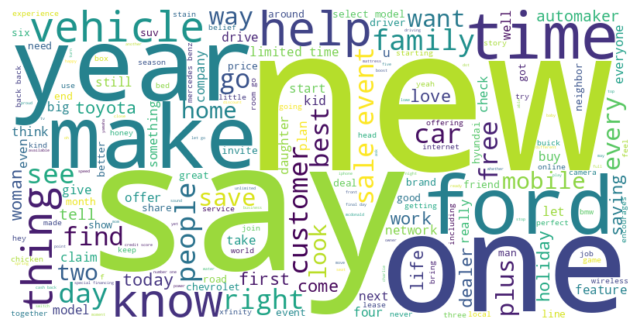

In [28]:
# Word cloud visualization
from wordcloud import WordCloud
text = ' '.join(corpus)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Model Development

## Nerual Network

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [30]:
# Use TF-IDF Vectorizer for text
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000) # It is a statistical measure used to evaluate the importance of a word in a document.
X = tfidf.fit_transform(corpus).toarray()

# Convert ground truth to numpy array
y = new_ground_truth.iloc[:].values

In [31]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Display the shapes of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 2650), (30, 2650), (120, 21), (30, 21))

### Artificial Neural Network

In [32]:
# Build the ANN model
ann = Sequential() # This is used to create a linear stack of layers for the neural network

# Adding the input layer and first hidden layer
ann.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))
# In the above line, Dense is used to create fully connected (dense) layers in the neural network
ann.add(Dropout(0.5)) # Adding dropout layers, which help prevent overfitting

# Adding the second hidden layer
ann.add(Dense(units=64, activation='relu')) # Units specifies, number of Neurons in this dense layer
ann.add(Dropout(0.5))

# Adding the third hidden layer
ann.add(Dense(units=32, activation='relu'))
ann.add(Dropout(0.5))

# Adding the fourth hidden layer
ann.add(Dense(units=16, activation='relu'))
ann.add(Dropout(0.5))

# Adding the output layer
ann.add(Dense(units=21, activation='sigmoid')) # Adds a dense layer with 21 neurons (for each 21 binary questions)

# Compiling the ANN
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
ann.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               339328    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                5

In [33]:
# Train the model
history = ann.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
3/3 [==============================] - 4s 374ms/step - loss: 0.6931 - accuracy: 0.0312 - val_loss: 0.6916 - val_accuracy: 0.1250
Epoch 2/20
3/3 [==============================] - 0s 67ms/step - loss: 0.6909 - accuracy: 0.0312 - val_loss: 0.6896 - val_accuracy: 0.1250
Epoch 3/20
3/3 [==============================] - 0s 43ms/step - loss: 0.6888 - accuracy: 0.0625 - val_loss: 0.6874 - val_accuracy: 0.0833
Epoch 4/20
3/3 [==============================] - 0s 47ms/step - loss: 0.6860 - accuracy: 0.1250 - val_loss: 0.6850 - val_accuracy: 0.0833
Epoch 5/20
3/3 [==============================] - 0s 48ms/step - loss: 0.6850 - accuracy: 0.0938 - val_loss: 0.6823 - val_accuracy: 0.0833
Epoch 6/20
3/3 [==============================] - 0s 44ms/step - loss: 0.6831 - accuracy: 0.0312 - val_loss: 0.6793 - val_accuracy: 0.0833
Epoch 7/20
3/3 [==============================] - 0s 69ms/step - loss: 0.6797 - accuracy: 0.0208 - val_loss: 0.6756 - val_accuracy: 0.0833
Epoch 8/20
3/3 [==========

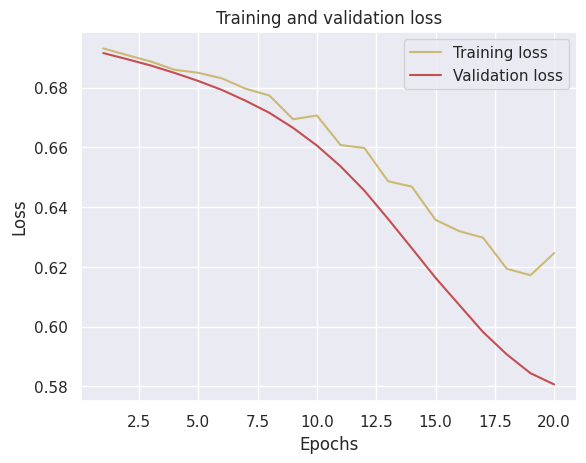

In [34]:
# Visualizes the training and validation loss over epochs

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

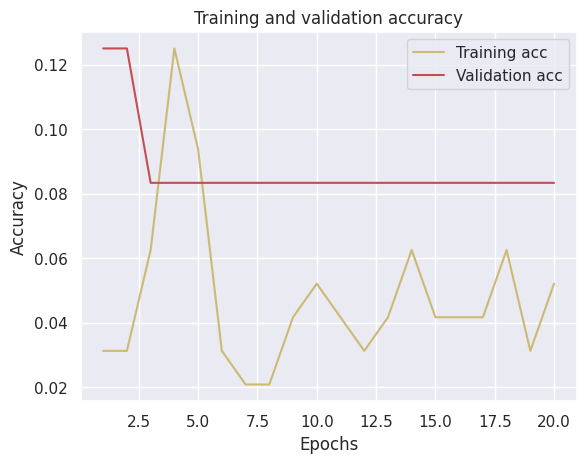

In [35]:
# Visualizes the training and validation accuracy over epochs

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The accuracy is `21` because the model is mostly failed to predict all 21 questions correctly for the test set. Therefore, we need to calculate each question's accuracy instead of all

In [36]:
from sklearn.metrics import classification_report

# Evaluate the model on the test set
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5).astype(int) # Converting Probabilities to Binary predection

# Classification report for each question
ann_evaluation = {f'question_{i+1}': classification_report(y_test[:, i], y_pred[:, i], output_dict=True) for i in range(y.shape[1])}


1/1 [==============================] - 1s 606ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Calculating the overall performance of the model

In [37]:
# Creating a function to calculate overall performce of a model

accuracies = {'Logistic':0.0,
              'SVC':0.0,
              'RandomForest': 0.0,
              'ANN':0.0,
              'RNN':0.0,
              'GaussianNB':0.0} # This will store the overall performance of each model

def calculate_overall_performance(evaluation, model_name):
  # Initialize variables to aggregate metrics
  total_precision = 0
  total_recall = 0
  total_f1_score = 0
  total_accuracy = 0
  num_questions = 21

  # Aggregate metrics across all questions
  for question, metrics in evaluation.items():
      total_precision += metrics['weighted avg']['precision']
      total_recall += metrics['weighted avg']['recall']
      total_f1_score += metrics['weighted avg']['f1-score']
      total_accuracy += metrics['accuracy']

  # Calculate average metrics
  average_precision = total_precision / num_questions
  average_recall = total_recall / num_questions
  average_f1_score = total_f1_score / num_questions
  average_accuracy = total_accuracy / num_questions

  # Display the overall metrics
  overall_metrics = {
      'average_precision': average_precision,
      'average_recall': average_recall,
      'average_f1_score': average_f1_score,
      'average_accuracy': average_accuracy
  }
  accuracies[model_name] = average_accuracy

  print(f"Overall {model_name} Performance Metrics:")
  for metric, value in overall_metrics.items():
      print(f"{metric}: {value}")


In [38]:
# Calculate overall performance metrics
calculate_overall_performance(ann_evaluation, "ANN")

Overall ANN Performance Metrics:
average_precision: 0.5268253968253968
average_recall: 0.7000000000000001
average_f1_score: 0.5932961654222925
average_accuracy: 0.7000000000000001


### Recurrent Neural Network (RNN) with Long Short-Term

**Tokenize and Pad Sequences**

In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(corpus)
X = tokenizer.texts_to_sequences(corpus)
X = pad_sequences(X, maxlen=200)

# Convert ground truth to numpy array
y = new_ground_truth.to_numpy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(
    X, y, range(len(X)), test_size=0.2, random_state=0)

In [40]:
from tensorflow.keras.initializers import Constant # Initialize the weights of the embedding layer with pre-trained values

# Load pre-trained GloVe embeddings
embedding_dim = 100
word_index = tokenizer.word_index # Retrieves the word-to-index mapping from the tokenizer
num_words = min(10000, len(word_index) + 1) # Defines the number of words to be considered from the vocabulary

# Initialize embedding matrix
embedding_matrix = np.zeros((num_words, embedding_dim))

# Path to GloVe file
glove_file = 'glove.6B.100d.txt' # Sets the path to the GloVe file that contains the pre-trained word vectors

# Loading GloVe embeddings into the Matrix
with open(glove_file, 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        if word in word_index and word_index[word] < num_words:
            embedding_matrix[word_index[word]] = coefs


In [41]:
# Build the RNN LSTM model
model = Sequential()

# Adding embidding layer
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=200,
                    trainable=False))

model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2)) # Adds an LSTM layer with 128 units
# Adds a fully connected layer with units and ReLU activation function
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y.shape[1], activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
3/3 [==============================] - 10s 1s/step - loss: 0.7004 - accuracy: 0.0625 - val_loss: 0.6918 - val_accuracy: 0.1250
Epoch 2/20
3/3 [==============================] - 4s 1s/step - loss: 0.6943 - accuracy: 0.0312 - val_loss: 0.6904 - val_accuracy: 0.0000e+00
Epoch 3/20
3/3 [==============================] - 4s 1s/step - loss: 0.6916 - accuracy: 0.0521 - val_loss: 0.6891 - val_accuracy: 0.0000e+00
Epoch 4/20
3/3 [==============================] - 3s 945ms/step - loss: 0.6914 - accuracy: 0.0208 - val_loss: 0.6874 - val_accuracy: 0.0000e+00
Epoch 5/20
3/3 [==============================] - 2s 798ms/step - loss: 0.6855 - accuracy: 0.0521 - val_loss: 0.6861 - val_accuracy: 0.0000e+00
Epoch 6/20
3/3 [==============================] - 3s 1s/step - loss: 0.6859 - accuracy: 0.0000e+00 - val_loss: 0.6853 - val_accuracy: 0.0000e+00
Epoch 7/20
3/3 [==============================] - 3s 1s/step - loss: 0.6863 - accuracy: 0.0000e+00 - val_loss: 0.6844 - val_accuracy: 0.0000e+00
Ep

In [42]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Classification report for each question
rnn_evaluation = {f'question_{i+1}': classification_report(y_test[:, i], y_pred[:, i], output_dict=True) for i in range(y.shape[1])}

1/1 [==============================] - 0s 422ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [43]:
calculate_overall_performance(rnn_evaluation, "RNN")

Overall RNN Performance Metrics:
average_precision: 0.5825155019272665
average_recall: 0.7031746031746033
average_f1_score: 0.6181401954301641
average_accuracy: 0.7031746031746033


## Logistic Regression

### Tokenizing text

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

cv = TfidfVectorizer()

X = cv.fit_transform(corpus).toarray()
y = new_ground_truth

In [45]:
print(len(X[0]))

2650


In [46]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
y.shape

(150, 21)

In [48]:
# Spliting the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [49]:
y_train

,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,...,question_12,question_13,question_14,question_15,question_16,question_17,question_18,question_19,question_20,question_21
137,0,0,0,0,0,0,0,1,0,1,...,1,1,0,0,1,0,0,1,1,0
84,0,1,1,1,1,0,0,1,1,1,...,1,1,0,0,1,1,0,1,1,0
27,0,0,0,0,0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,1,1
127,0,0,0,0,0,0,0,1,0,1,...,1,1,0,0,0,0,0,1,1,0
132,0,0,0,0,0,0,0,1,0,0,...,1,1,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0,0,1,0,0,0,0,1,1,1,...,0,1,0,0,0,1,0,1,1,1
103,0,0,0,0,0,0,0,1,0,1,...,1,1,0,0,0,1,0,1,1,0
67,0,0,1,1,1,0,0,1,1,1,...,1,0,0,0,1,0,0,0,0,0
117,1,1,1,0,1,0,1,1,1,1,...,1,1,1,0,1,1,0,1,1,0


In [50]:
from sklearn.linear_model import LogisticRegression


models = {} # This will store the LogisticRegression model for each question
predictions_df = pd.DataFrame(index=y_test.index) # This will store the predictions for each question

# This starts a loop that iterates over each column name in the y DataFrame
for question in y.columns: # Each column in y represents a different question (binary label)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train[question])
    models[question] = model
    predictions_df[question] = model.predict(X_test)

In [51]:
# Evaluate the models on the test set
logistic_evaluation = {question: classification_report(y_test[question], predictions_df[question], output_dict=True) for question in y.columns}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [52]:
# The logistic_evaluation contains a evaluation metrics for each question
logistic_evaluation

{'question_1': {'0': {'precision': 0.7333333333333333,
   'recall': 1.0,
   'f1-score': 0.846153846153846,
   'support': 22},
  '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 8},
  'accuracy': 0.7333333333333333,
  'macro avg': {'precision': 0.36666666666666664,
   'recall': 0.5,
   'f1-score': 0.423076923076923,
   'support': 30},
  'weighted avg': {'precision': 0.5377777777777778,
   'recall': 0.7333333333333333,
   'f1-score': 0.6205128205128204,
   'support': 30}},
 'question_2': {'0': {'precision': 0.5555555555555556,
   'recall': 0.9375,
   'f1-score': 0.6976744186046512,
   'support': 16},
  '1': {'precision': 0.6666666666666666,
   'recall': 0.14285714285714285,
   'f1-score': 0.23529411764705882,
   'support': 14},
  'accuracy': 0.5666666666666667,
  'macro avg': {'precision': 0.6111111111111112,
   'recall': 0.5401785714285714,
   'f1-score': 0.466484268125855,
   'support': 30},
  'weighted avg': {'precision': 0.6074074074074074,
   'recall': 0.5666666666

In [53]:
calculate_overall_performance(logistic_evaluation, "Logistic")

Overall Logistic Performance Metrics:
average_precision: 0.596305276919312
average_recall: 0.7079365079365081
average_f1_score: 0.621241047530794
average_accuracy: 0.7079365079365081


## Support Vector Classifier (SVC)

In [54]:
from sklearn.svm import SVC

svc_models = {}
svc_predictions = pd.DataFrame(index=y_test.index)
for question in y.columns:
    model = SVC(kernel='linear', probability=True)
    model.fit(X_train,y_train[question])
    svc_models[i] = model
    svc_predictions[question] = model.predict(X_test)

In [55]:
# Evaluation of SVC for each question
svc_evaluation = {question: classification_report(y_test[question], svc_predictions[question], output_dict=True) for question in y.columns}



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [56]:
calculate_overall_performance(svc_evaluation, "SVC")

Overall SVC Performance Metrics:
average_precision: 0.6953037189123508
average_recall: 0.7301587301587302
average_f1_score: 0.6663401462916788
average_accuracy: 0.7301587301587302


## Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_models = {}
rf_predictions = pd.DataFrame(index=y_test.index)
for question in y.columns:
    model = RandomForestClassifier(n_estimators=200)

    model.fit(X_train, y_train[question])
    rf_models[i] = model
    rf_predictions[question] = model.predict(X_test)


In [58]:
# Evaluation of RandomForest for each question
rf_evaluation = {question: classification_report(y_test[question], rf_predictions[question], output_dict=True) for question in y.columns}



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [59]:
calculate_overall_performance(rf_evaluation, "RandomForest")

Overall RandomForest Performance Metrics:
average_precision: 0.7052027615270055
average_recall: 0.7507936507936508
average_f1_score: 0.6881859409717952
average_accuracy: 0.7507936507936508


## GausionNB Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB

nb_models = {}
nb_predictions = pd.DataFrame(index=y_test.index)
for question in y.columns:
    model = GaussianNB()
    model.fit(X_train, y_train[question])
    nb_models[i] = model
    nb_predictions[question] = model.predict(X_test)

In [61]:
# Evaluation of RandomForest for each question

nb_evaluation = {question: classification_report(y_test[question],
                nb_predictions[question], output_dict=True) for question in y.columns}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
calculate_overall_performance(nb_evaluation, "GaussianNB")

Overall GaussianNB Performance Metrics:
average_precision: 0.6921656777561266
average_recall: 0.7079365079365081
average_f1_score: 0.6727599008759712
average_accuracy: 0.7079365079365081


## BERT Model

In [92]:
import torch
from torch.utils.data import Dataset
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import classification_report
import tempfile

In [76]:
col = ground_truth.columns[23:]
ground_truth.drop(columns=col, inplace=True)
ground_truth.columns

Index(['Timestamp', 'creative_data_id',
       'Is there a call to go online (e.g., shop online, visit the Web)? ',
       'Is there online contact information provided (e.g., URL, website)? ',
       'Is there a visual or verbal call to purchase (e.g., buy now, order now)?',
       'Does the ad portray a sense of urgency to act (e.g., buy before sales ends, order before ends)? ',
       'Is there an incentive to buy (e.g., a discount, a coupon, a sale or "limited time offer")? ',
       'Is there offline contact information provided (e.g., phone, mail, store location)?',
       'Is there mention of something free? ',
       'Does the ad mention at least one specific product or service (e.g., model, type, item)? ',
       'Is there any verbal or visual mention of the price?',
       'Does the ad show the brand (logo, brand name) or trademark (something that most people know is the brand) multiple times?\n\nFor example, Nike ads often have the "swoosh" logo prominently displayed on shoe

In [77]:
ground_truth.drop(columns='Timestamp', inplace=True)

In [78]:
new_columns = [ground_truth.columns[0]] + [f'question_{i+1}' for i in range(len(ground_truth.columns) - 1)]
ground_truth.columns = new_columns


In [79]:
ground_truth.iloc[:, 1:] = ground_truth.iloc[:, 1:].replace({'Yes': 1, 'No': 0})
ground_truth.head()

,creative_data_id,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,...,question_12,question_13,question_14,question_15,question_16,question_17,question_18,question_19,question_20,question_21
0,1471363,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,1488315,0,0,0,0,0,0,0,1,0,...,1,1,1,0,0,1,0,1,0,0
2,1526213,0,0,0,0,1,1,0,1,1,...,0,1,0,0,0,1,0,1,1,0
3,1548815,0,0,0,0,0,0,0,1,0,...,1,1,1,0,1,1,1,0,1,1
4,1624211,0,0,0,0,0,0,0,1,0,...,1,1,0,0,0,1,0,0,0,0


In [80]:
textual_data.head()

,creative_data_id,creative_data_title,creative_data_description,creative_data_duration,creative_data_lifetime_spend_estimated,creative_data_lifetime_airings_count,creative_data_airing_date_first_et,creative_data_airing_date_last_et,speech,combined_text
0,1471363,30s Add Stories [T1] - 1471363,"The new MINI Countryman is the largest yet, pr...",30,7863776.27,2788,2017-02-02T21:20:48-05:00,2018-07-09T08:50:58-04:00,It's another pure gray morning. Don't know wha...,"The new MINI Countryman is the largest yet, pr..."
1,1488315,30s Last Days - 1488315,What would you do if the end of the world was ...,30,20925675.98,3699,2017-03-05T06:37:33-05:00,2018-06-11T03:09:14-04:00,The end of civilization is upon us. Hold your ...,What would you do if the end of the world was ...
2,1526213,30s Instincts [T2] - 1526213,As a man speeds down a country road in his Aud...,30,426126.14,19,2017-05-17T19:01:07-04:00,2018-02-24T01:51:58-05:00,Audi presens can help prepare for and in some ...,As a man speeds down a country road in his Aud...
3,1548815,30s Keep the Peace [T1] - 1548815,"On an otherwise peaceful day, two giant monste...",30,1527188.86,313,2017-06-19T07:11:59-04:00,2019-01-06T22:17:44-05:00,The new Honda Odyssey has tons of available sm...,"On an otherwise peaceful day, two giant monste..."
4,1624211,30s Add It Up [T1] - 1624211,Chevy's spokesperson lists off all the feature...,30,8919085.29,1646,2017-10-29T19:42:44-04:00,2018-01-26T21:31:00-05:00,Hi guys. So this is the all new Chevy Equinox....,Chevy's spokesperson lists off all the feature...


In [81]:
# Merging transcriptions_df to ground_truth
ground_truth['transcription'] = textual_data['combined_text']

ground_truth.head()

,creative_data_id,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,...,question_13,question_14,question_15,question_16,question_17,question_18,question_19,question_20,question_21,transcription
0,1471363,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,"The new MINI Countryman is the largest yet, pr..."
1,1488315,0,0,0,0,0,0,0,1,0,...,1,1,0,0,1,0,1,0,0,What would you do if the end of the world was ...
2,1526213,0,0,0,0,1,1,0,1,1,...,1,0,0,0,1,0,1,1,0,As a man speeds down a country road in his Aud...
3,1548815,0,0,0,0,0,0,0,1,0,...,1,1,0,1,1,1,0,1,1,"On an otherwise peaceful day, two giant monste..."
4,1624211,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,Chevy's spokesperson lists off all the feature...


In [82]:
for col in ground_truth.columns[1:22]:
    ground_truth[col] = ground_truth[col].astype(int)

In [83]:
ground_truth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   creative_data_id  150 non-null    object
 1   question_1        150 non-null    int64 
 2   question_2        150 non-null    int64 
 3   question_3        150 non-null    int64 
 4   question_4        150 non-null    int64 
 5   question_5        150 non-null    int64 
 6   question_6        150 non-null    int64 
 7   question_7        150 non-null    int64 
 8   question_8        150 non-null    int64 
 9   question_9        150 non-null    int64 
 10  question_10       150 non-null    int64 
 11  question_11       150 non-null    int64 
 12  question_12       150 non-null    int64 
 13  question_13       150 non-null    int64 
 14  question_14       150 non-null    int64 
 15  question_15       150 non-null    int64 
 16  question_16       150 non-null    int64 
 17  question_17     

In [84]:
from transformers import BertTokenizer

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the transcription column
def tokenize_function(text):
    return tokenizer(text, padding='max_length', truncation=True)

# Apply the tokenizer to the transcription column
tokenized_data = ground_truth['transcription'].apply(tokenize_function)

# Extract input_ids and attention_mask
ground_truth['input_ids'] = tokenized_data.apply(lambda x: x['input_ids'])
ground_truth['attention_mask'] = tokenized_data.apply(lambda x: x['attention_mask'])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [96]:
import torch
from torch.utils.data import Dataset

class BinaryQuestionsDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float)
        return item

    def __len__(self):
        return len(self.labels)

# Prepare the dataset
labels = ground_truth.iloc[:, 1:22].values  # Assuming the labels are in columns 1 to 21
encodings = {
    'input_ids': torch.tensor(ground_truth['input_ids'].tolist()),
    'attention_mask': torch.tensor(ground_truth['attention_mask'].tolist())
}

dataset = BinaryQuestionsDataset(encodings, labels)



In [97]:
# from transformers import BertForSequenceClassification, Trainer, TrainingArguments
# import tempfile

# Define the model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=21)

temp_output_dir = tempfile.mkdtemp()
temp_logging_dir = tempfile.mkdtemp()

training_args = TrainingArguments(
    output_dir=temp_output_dir,  # Use temporary directory
    logging_dir=temp_logging_dir,  # Use temporary directory
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_steps=10,
    evaluation_strategy="epoch",
    disable_tqdm=True  # Disable the progress bar
)

small_dataset = torch.utils.data.Subset(dataset, range(50))

training_bert = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_dataset,
    eval_dataset=small_dataset
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead



In [98]:
# Train the model
training_bert.train()


<ipython-input-96-d6c332cbe0c4>:10: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



{'eval_loss': 0.7266466617584229, 'eval_runtime': 97.9777, 'eval_samples_per_second': 0.51, 'eval_steps_per_second': 0.071, 'epoch': 1.0}
{'loss': 0.7225, 'grad_norm': 1.5488182306289673, 'learning_rate': 1.0000000000000002e-06, 'epoch': 1.4285714285714286}
{'eval_loss': 0.7210891842842102, 'eval_runtime': 97.2592, 'eval_samples_per_second': 0.514, 'eval_steps_per_second': 0.072, 'epoch': 2.0}
{'loss': 0.7214, 'grad_norm': 1.7959102392196655, 'learning_rate': 2.0000000000000003e-06, 'epoch': 2.857142857142857}
{'eval_loss': 0.7116410136222839, 'eval_runtime': 97.41, 'eval_samples_per_second': 0.513, 'eval_steps_per_second': 0.072, 'epoch': 3.0}
{'train_runtime': 1355.3061, 'train_samples_per_second': 0.111, 'train_steps_per_second': 0.015, 'train_loss': 0.7215274856204078, 'epoch': 3.0}


TrainOutput(global_step=21, training_loss=0.7215274856204078, metrics={'train_runtime': 1355.3061, 'train_samples_per_second': 0.111, 'train_steps_per_second': 0.015, 'train_loss': 0.7215274856204078, 'epoch': 3.0})

In [99]:
# Evaluate the model
eval_results = training_bert.evaluate()
print(eval_results)


<ipython-input-96-d6c332cbe0c4>:10: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



{'eval_loss': 0.7116410136222839, 'eval_runtime': 119.7945, 'eval_samples_per_second': 0.417, 'eval_steps_per_second': 0.058, 'epoch': 3.0}
{'eval_loss': 0.7116410136222839, 'eval_runtime': 119.7945, 'eval_samples_per_second': 0.417, 'eval_steps_per_second': 0.058, 'epoch': 3.0}


In [107]:
from sklearn.metrics import classification_report, precision_recall_fscore_support


# Make predictions
predictions = training_bert.predict(dataset)

# Save predictions to a DataFrame
predictions_df = pd.DataFrame(predictions.predictions, columns=ground_truth.columns[1:22])
predictions_df = (predictions_df > 0.5).astype(int)  # Convert to binary predictions

# Calculate performance metrics for each question
overall_precision = 0
overall_recall = 0
overall_f1 = 0
num_questions = len(ground_truth.columns[1:22])

for i, question in enumerate(ground_truth.columns[1:22]):
    print(f"Performance for {question}:")
    report = classification_report(ground_truth[question], predictions_df[question], output_dict=True)
    print(report)

    # Aggregate overall performance
    precision, recall, f1, _ = precision_recall_fscore_support(ground_truth[question], predictions_df[question], average='binary')
    overall_precision += precision
    overall_recall += recall
    overall_f1 += f1

# Calculate overall metrics by averaging
overall_precision /= num_questions
overall_recall /= num_questions
overall_f1 /= num_questions

print(f"Overall Precision: {overall_precision}")
print(f"Overall Recall: {overall_recall}")
print(f"Overall F1 Score: {overall_f1}")

# Save the predictions to a CSV file
# predictions_df.to_csv('predictions.csv', index=False)



<ipython-input-96-d6c332cbe0c4>:10: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Performance for question_1:
{'0': {'precision': 0.74, 'recall': 1.0, 'f1-score': 0.8505747126436781, 'support': 111}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 39}, 'accuracy': 0.74, 'macro avg': {'precision': 0.37, 'recall': 0.5, 'f1-score': 0.42528735632183906, 'support': 150}, 'weighted avg': {'precision': 0.5476, 'recall': 0.74, 'f1-score': 0.6294252873563217, 'support': 150}}
Performance for question_2:
{'0': {'precision': 0.5053763440860215, 'recall': 0.5595238095238095, 'f1-score': 0.5310734463276836, 'support': 84}, '1': {'precision': 0.3508771929824561, 'recall': 0.30303030303030304, 'f1-score': 0.3252032520325204, 'support': 66}, 'accuracy': 0.44666666666666666, 'macro avg': {'precision': 0.4281267685342388, 'recall': 0.43127705627705626, 'f1-score': 0.42813834918010196, 'support': 150}, 'weighted avg': {'precision': 0.4373967176004527, 'recall': 0.44666666666666666, 'f1-score': 0.4404905608378118, 'support': 150}}
Performance for question_3:
{'0': {'

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter

Performance for question_15:
{'0': {'precision': 0.8733333333333333, 'recall': 1.0, 'f1-score': 0.9323843416370107, 'support': 131}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 19}, 'accuracy': 0.8733333333333333, 'macro avg': {'precision': 0.43666666666666665, 'recall': 0.5, 'f1-score': 0.46619217081850534, 'support': 150}, 'weighted avg': {'precision': 0.7627111111111111, 'recall': 0.8733333333333333, 'f1-score': 0.8142823250296559, 'support': 150}}
Performance for question_16:
{'0': {'precision': 0.5466666666666666, 'recall': 1.0, 'f1-score': 0.7068965517241379, 'support': 82}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 68}, 'accuracy': 0.5466666666666666, 'macro avg': {'precision': 0.2733333333333333, 'recall': 0.5, 'f1-score': 0.35344827586206895, 'support': 150}, 'weighted avg': {'precision': 0.2988444444444444, 'recall': 0.5466666666666666, 'f1-score': 0.3864367816091954, 'support': 150}}
Performance for question_17:
{'0': {'precisi

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter

The overall performance metrics we obtained:
- Precision: 0.1255
- Recall: 0.0871
- F1 Score: 0.0589

Indicating that the model is not performing well. These low values suggest that the model is struggling to correctly classify the binary questions.

**Potential Reasons for Poor Performance:**
1. The dataset might contain noisy data
2. BERT is a complex model and might be overfitting or underfitting the data
3. The model was trained for only one epoch, which might not be sufficient

# Metrics

In [63]:
accuracies

{'Logistic': 0.7079365079365081,
 'SVC': 0.7301587301587302,
 'RandomForest': 0.7507936507936508,
 'ANN': 0.7000000000000001,
 'RNN': 0.7031746031746033,
 'GaussianNB': 0.7079365079365081}

**Ploting accuries of all models**

<ipython-input-64-8e8ea715e8db>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df, palette=sns.color_palette('Set1'))
<ipython-input-64-8e8ea715e8db>:5: UserWarning: The palette list has more values (9) than needed (6), which may not be intended.
  sns.barplot(x='Model', y='Accuracy', data=df, palette=sns.color_palette('Set1'))


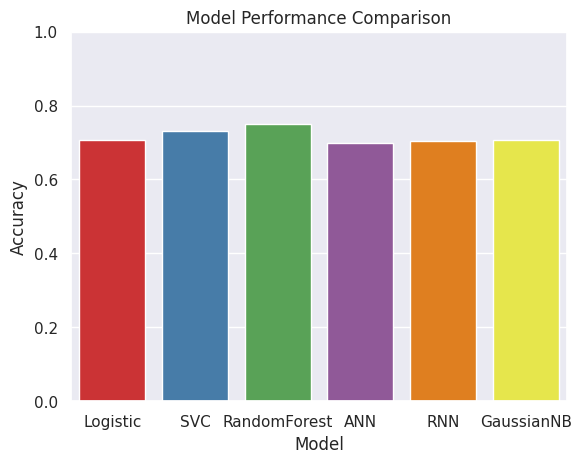

In [64]:
# Ploting every Model accuracies
df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])

# Create the bar chart
sns.barplot(x='Model', y='Accuracy', data=df, palette=sns.color_palette('Set1'))

# Add titles and labels
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Show the plot
plt.ylim(0, 1)

plt.show()

Amoung all models, Random Forest Classifier performs well with high avegrage accuracy of 75.08%.

Now, let's plot all the metrics for Random Forest Classifier for every question

In [133]:
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

# Extract evaluation metrics of every question for plotting
precision_scores = [rf_evaluation[f'question_{i+1}']['weighted avg']['precision'] for i in range(y.shape[1])]
recall_scores = [rf_evaluation[f'question_{i+1}']['weighted avg']['recall'] for i in range(y.shape[1])]
f1_scores = [rf_evaluation[f'question_{i+1}']['weighted avg']['f1-score'] for i in range(y.shape[1])]

questions = [f'question_{i+1}' for i in range(y.shape[1])]

# Create traces
precision_trace = go.Bar(x=questions, y=precision_scores, name='Precision', marker=dict(color='blue'))
recall_trace = go.Bar(x=questions, y=recall_scores, name='Recall', marker=dict(color='orange'))
f1_trace = go.Bar(x=questions, y=f1_scores, name='F1 Score', marker=dict(color='green'))

# Create a figure
fig = make_subplots(rows=1, cols=1)

# Add traces
fig.add_trace(precision_trace, row=1, col=1)
fig.add_trace(recall_trace, row=1, col=1)
fig.add_trace(f1_trace, row=1, col=1)

# Update layout
fig.update_layout(
    title='Evaluation Metrics for Each Question',
    xaxis=dict(title='Questions', tickmode='linear'),
    yaxis=dict(title='Scores'),
    barmode='group',
    legend=dict(x=0.1, y=1.1, orientation='h'),
    template='plotly_white'
)

# Show the plot
fig.show()


## Saving predictions to a data set

In [111]:
rf_predictions['creative_data_id'] = textual_data['creative_data_id'].iloc[y_test.index]
rf_predictions.reset_index(drop=True, inplace=True)
rf_predictions.head()

,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,...,question_13,question_14,question_15,question_16,question_17,question_18,question_19,question_20,question_21,creative_data_id
0,0,1,1,1,1,0,0,1,1,1,...,1,0,0,1,1,0,1,1,0,NaN
1,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,1,0,1,1,0,NaN
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,1,0,1,1,0,NaN
3,0,1,0,0,1,0,0,1,0,1,...,1,0,0,1,0,0,0,1,0,NaN
4,0,1,1,1,1,0,0,1,1,1,...,1,0,0,0,1,0,0,1,0,NaN


In [112]:
predictions_df = rf_predictions[['creative_data_id', 'question_1', 'question_2', 'question_3', 'question_4', 'question_5',
       'question_6', 'question_7', 'question_8', 'question_9', 'question_10',
       'question_11', 'question_12', 'question_13', 'question_14',
       'question_15', 'question_16', 'question_17', 'question_18',
       'question_19', 'question_20', 'question_21']]
predictions_df.head()

,creative_data_id,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,...,question_12,question_13,question_14,question_15,question_16,question_17,question_18,question_19,question_20,question_21
0,NaN,0,1,1,1,1,0,0,1,1,...,1,1,0,0,1,1,0,1,1,0
1,NaN,0,0,0,0,0,0,0,1,0,...,1,1,0,0,0,1,0,1,1,0
2,NaN,0,0,0,0,0,0,0,1,0,...,1,1,0,0,0,1,0,1,1,0
3,NaN,0,1,0,0,1,0,0,1,0,...,1,1,0,0,1,0,0,0,1,0
4,NaN,0,1,1,1,1,0,0,1,1,...,1,1,0,0,0,1,0,0,1,0


In [113]:
binary_columns = ['question_1', 'question_2', 'question_3', 'question_4', 'question_5',
       'question_6', 'question_7', 'question_8', 'question_9', 'question_10',
       'question_11', 'question_12', 'question_13', 'question_14',
       'question_15', 'question_16', 'question_17', 'question_18',
       'question_19', 'question_20', 'question_21']

# Convert Binary columns to `Yes`/`No`
predictions_df[binary_columns] = predictions_df[binary_columns].replace({1: 'Yes', 0: 'No'})

# # Saving it to the CSV
predictions_df.to_csv('padala.r_answers.csv', index=False)

## Additional Analysis

**Low performance questions in Random Forest Classifier**

In [114]:
# Analyze the performance of the classifier on specific questions
def analyze_performance(evaluation, y_test, y_pred):
    low_performance_questions = []
    for i in range(y.shape[1]):
        f1_score = evaluation[f'question_{i+1}']['weighted avg']['f1-score']
        if f1_score < 0.5:
            low_performance_questions.append(f'question_{i+1}')
    return low_performance_questions

# Identify questions with low performance
low_performance_questions = analyze_performance(rf_evaluation, y_test, rf_predictions)

low_performance_questions


['question_17']

**Agreement percentage amoung human coders**

In [127]:
# Calculate agreement percentage among human coders
def calculate_agreement(ground_truth):
    agreements = []
    for question in questions:
        agreement = new_ground_truth[question].value_counts(normalize=True).max()
        agreements.append(agreement)
    return agreements

# Agreement percentages
agreement_percentages = calculate_agreement(ground_truth)
agreement_percentages

[0.74,
 0.56,
 0.64,
 0.7533333333333333,
 0.58,
 0.8333333333333334,
 0.9266666666666666,
 0.84,
 0.6666666666666666,
 0.8466666666666667,
 0.8533333333333334,
 0.7933333333333333,
 0.8266666666666667,
 0.7666666666666667,
 0.8733333333333333,
 0.5466666666666666,
 0.62,
 0.8066666666666666,
 0.5533333333333333,
 0.6866666666666666,
 0.7733333333333333]

The Output `agreement_percentage` represents the agreements percentage amoung human coders for each question in the ground truth data. The percentage indicates how consistently the human coders provided the same for each question across all ads.

Now, I am coparing the model's performance (measuared by F1 score) with the agreement percentage amoung human coders for each question to understand if there's a correlation between how consistently human coders agree on an answer and how well the model performs on the same question.

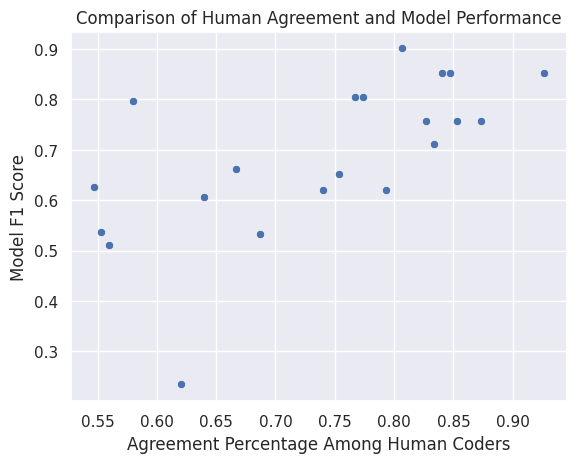

In [128]:
# Compare model performance with agreement percentages
def compare_performance_with_agreement(agreement_percentages, evaluation):
    comparison = []
    for i in range(len(agreement_percentages)):
        f1_score = evaluation[f'question_{i+1}']['weighted avg']['f1-score']
        comparison.append((agreement_percentages[i], f1_score))
    return comparison

# Comparison between human agreement and model performance
comparison = compare_performance_with_agreement(agreement_percentages, rf_evaluation)

# Visualize the comparison
import matplotlib.pyplot as plt

agreement_scores, f1_scores = zip(*comparison)
sns.scatterplot(x=agreement_scores, y=f1_scores)
plt.xlabel('Agreement Percentage Among Human Coders')
plt.ylabel('Model F1 Score')
plt.title('Comparison of Human Agreement and Model Performance')
plt.show()


There is a general positive trend in the plot, indicating that the model tends to perfom better (higher F1 scores) on questions where there is higher agreement amoung human coders.

**Agreement percentage of Predections**

In [131]:
# Calculate agreement percentage among human coders
def calculate_agreement(df):
    agreements = []
    for question in questions:
        agreement = df[question].value_counts(normalize=True).max()
        agreements.append(agreement)
    return agreements

# Agreement percentages
pred_agreement_percentages = calculate_agreement(predictions_df)
pred_agreement_percentages

[1.0,
 0.8333333333333334,
 0.7666666666666667,
 0.8666666666666667,
 0.6333333333333333,
 1.0,
 1.0,
 1.0,
 0.8333333333333334,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.6333333333333333,
 0.9666666666666667,
 1.0,
 0.8666666666666667,
 1.0,
 1.0]

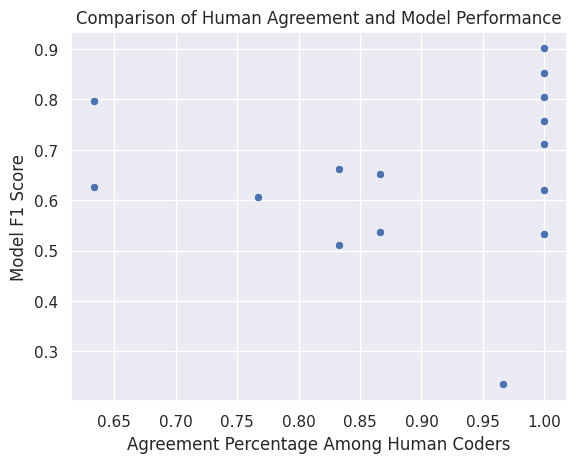

In [132]:
# Compare model performance with agreement percentages
def compare_performance_with_agreement(agreement_percentages, evaluation):
    comparison = []
    for i in range(len(agreement_percentages)):
        f1_score = evaluation[f'question_{i+1}']['weighted avg']['f1-score']
        comparison.append((agreement_percentages[i], f1_score))
    return comparison

# Comparison between human agreement and model performance
comparison = compare_performance_with_agreement(pred_agreement_percentages, rf_evaluation)

# Visualize the comparison
import matplotlib.pyplot as plt

agreement_scores, f1_scores = zip(*comparison)
sns.scatterplot(x=agreement_scores, y=f1_scores)
plt.xlabel('Agreement Percentage Among Human Coders')
plt.ylabel('Model F1 Score')
plt.title('Comparison of Human Agreement and Model Performance')
plt.show()

**Model Performance:**
The accuracies of each model were as follows:

- Logistic Regression: 70.8%
- SVC: 73.1%
- Random Forest: 75.1%
- ANN: 70.00%
- RNN: 70.4%
- GaussianNB: 70.8%
- BERT Model
    * Precision: 0.1255
    * Recall: 0.0871
    * F1 Score: 0.0589

The `Random Forest` model achieved the highest accuracy `(75.08%)`, indicating its robustness in handling the binary classification tasks. `SVC` also performed well, with an accuracy of `(73.02)`, slightly lower than Random forest. The `ANN` & `RNN` models had low accuries, suggesting that the complexity of neural network did not provide a significant advantages for this specific task.

The BERT model, despite its advanced architecture and potential for handeling textual data, did not perform as well as expected in this context. Its precison, recall, f1 score were relatively low, indicating challenges in effectively classifying the binary tasks.

**Conclusion:**

This challenge demonstrated the importance of data quality, feature engineering, and model selection in developing accurate classifiers for binary classification tasks. While traditional models like Random Forest and SVC performed well, the ANN and RNN models did not show significant improvements, highlighting the need for careful consideration of model complexity relative to the task. The BERT model's underperformance underscores the necessity of thorough tuning and potentially larger datasets to fully leverage its capabilities.

The detailed analysis and insights gained from human coders' responses and model performance provided a strong foundation for future enhancements. Moving forward, improving data augmentation techniques, exploring more extensive hyperparameter tuning, and possibly integrating ensemble methods could yield better performance. This study underscores the dynamic nature of model selection and the critical role of empirical testing in achieving optimal results.